In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv("Data 2/Indian Liver Patient Dataset (ILPD).csv")



In [3]:
data.head(3)

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1


In [4]:
data.shape

(582, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


In [6]:
#File does not contain headers so we need to load the headers manually
features = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 'Albumin_Globulin_Ratio', 'Target']
df = pd.read_csv('Data 2/Indian Liver Patient Dataset (ILPD).csv', names = features)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [9]:
df.shape

(583, 11)

In [10]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_Globulin_Ratio', 'Target'],
      dtype='object')

In [11]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [12]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

In [13]:
df.loc[df['Albumin_Globulin_Ratio'].isnull()==True]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


# EDA

### Univariate Analysis

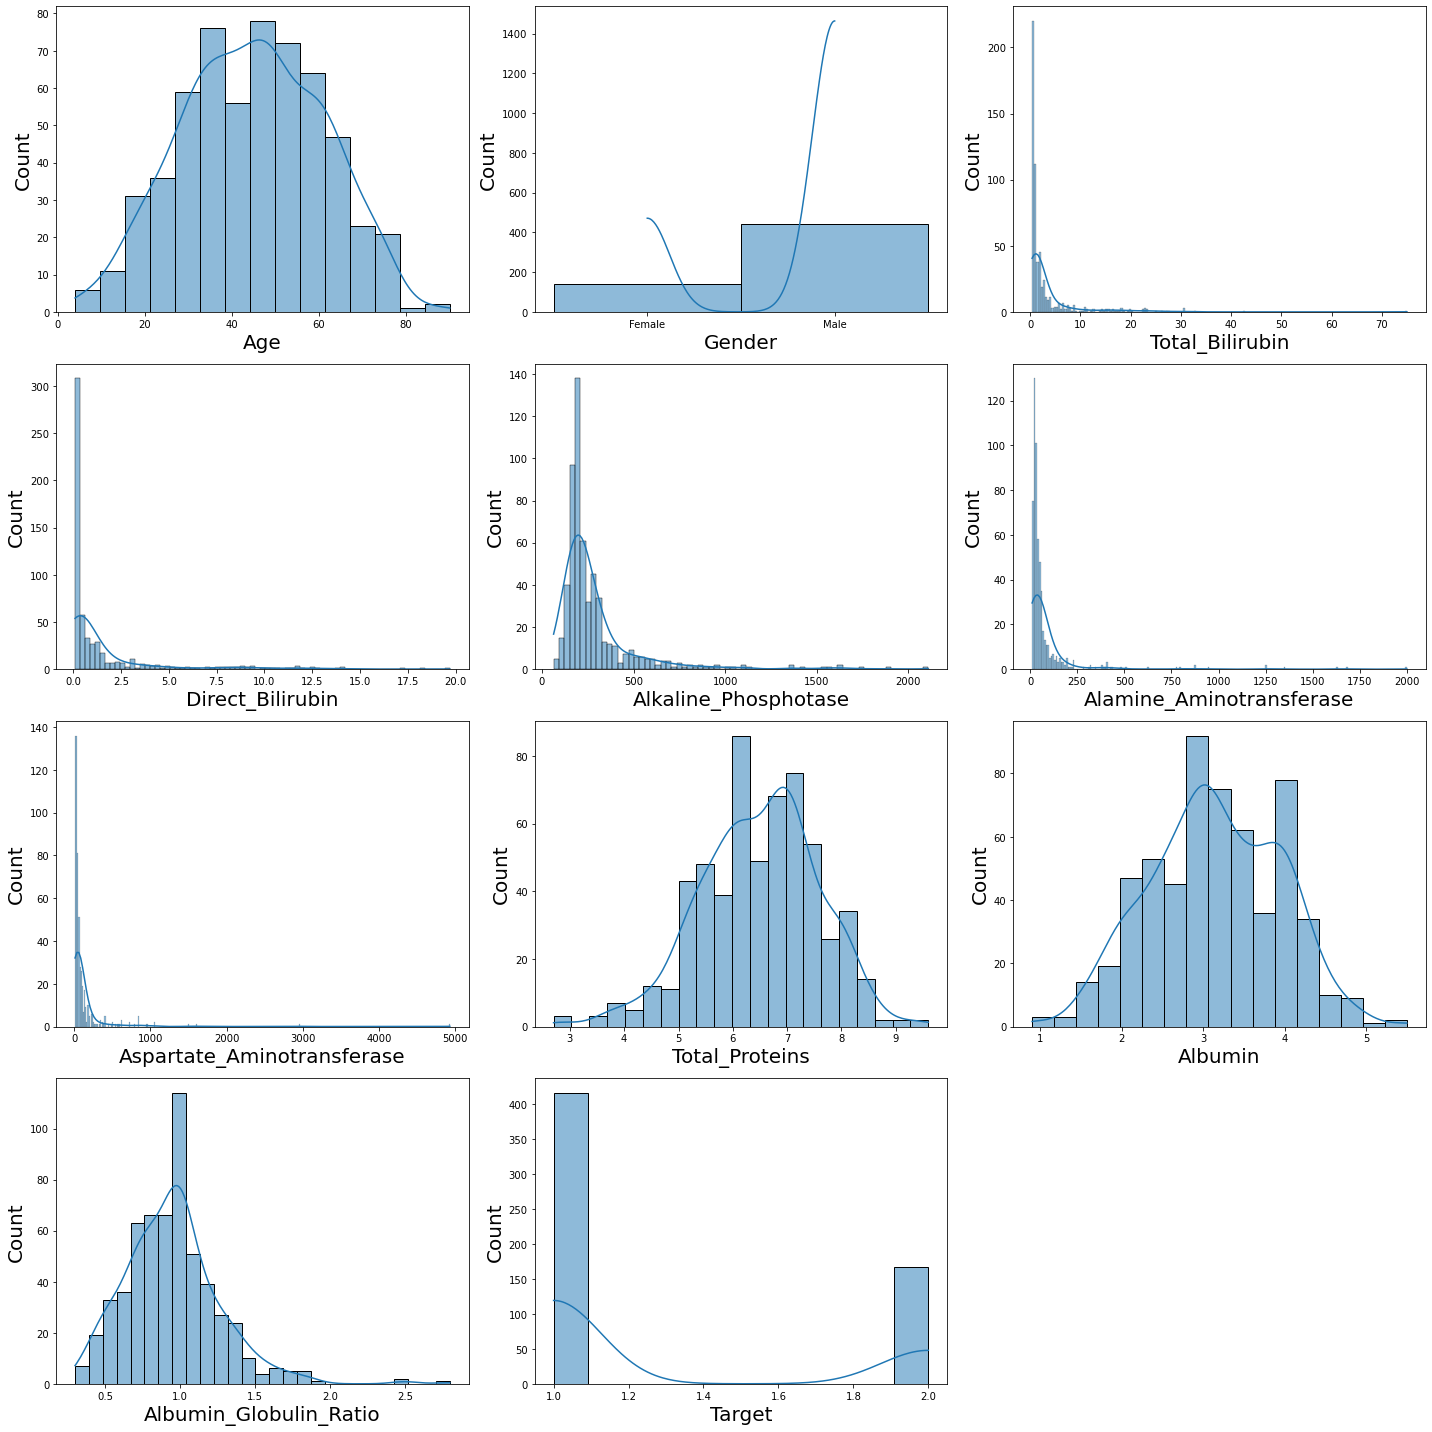

In [14]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

In [ ]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

### Key Observations:
* Age of patients range from 4-90. 5.8% are 60 years old.
* 76% of patients are Male.
* Almost 50% patients have total bilirubin between 0.6-0.8
* Around 50% patients have direct bilirubin between 0.1-0.3
* 71% patients are with liver disease. Its an imbalanced dataset.

### Bivariate Analysis

### 1. Categorical data

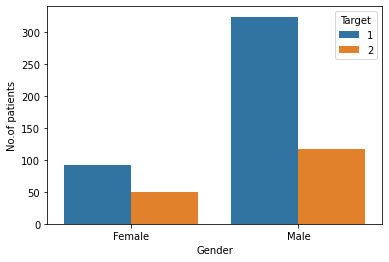

In [15]:
sns.countplot(x=df['Gender'],hue=df.Target)
plt.xlabel('Gender',fontsize=10) 
plt.ylabel('No.of patients',fontsize=10)
plt.show()

* ### Most of the MALE patients have liver disease

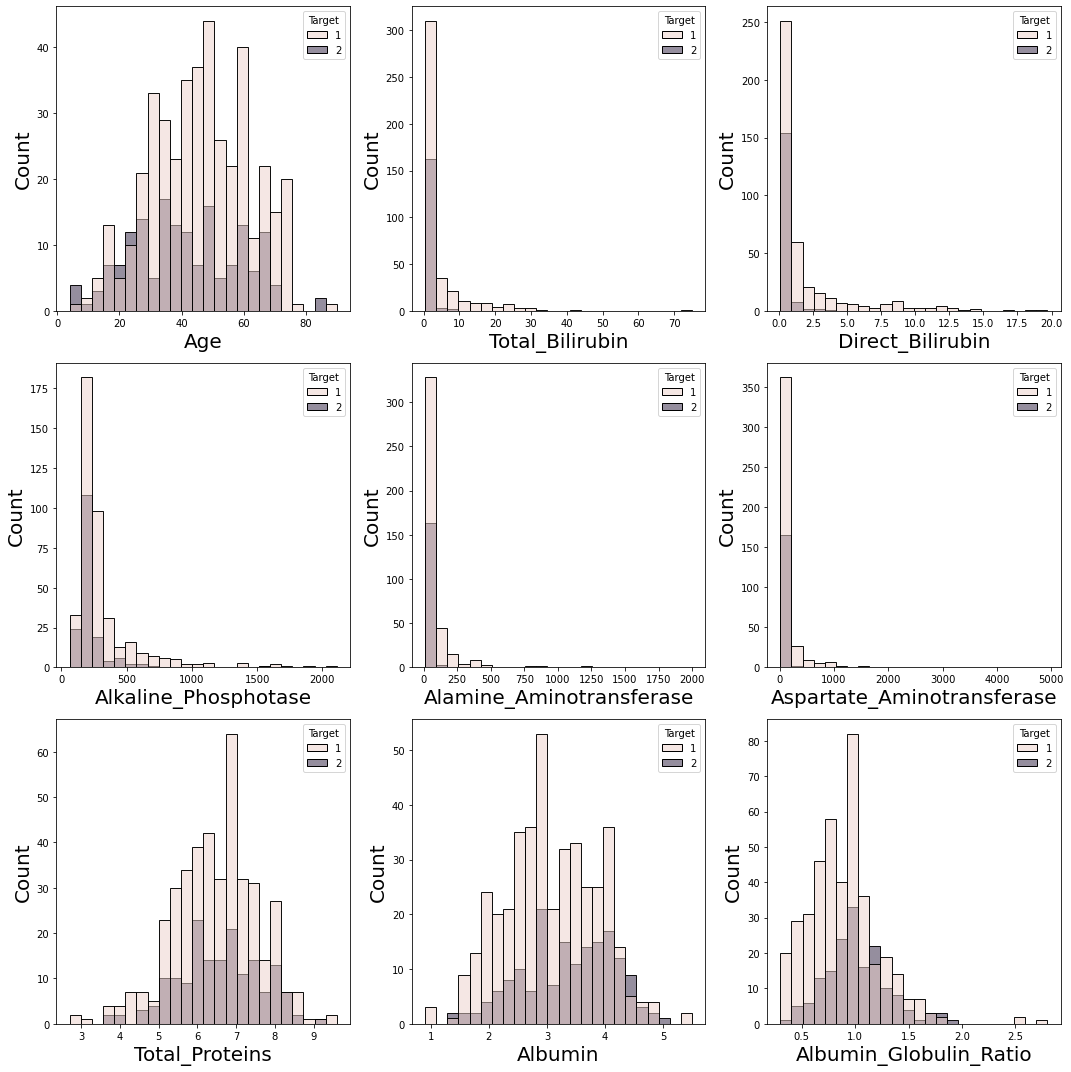

In [19]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(15,15), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in df.drop(['Gender','Target'],axis=1):#acessing columns form data2 DataFrame
    if plotnumber<=9 :#checking whether counter is less than 16 or not
        ax = plt.subplot(3,3,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=df[column].dropna(axis=0)# plotting hist plot and dropping null values,classification according to target
                        ,hue=df.Target,bins=24)
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('Count',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

* #### People around 50 years are affected with liver disease the most.

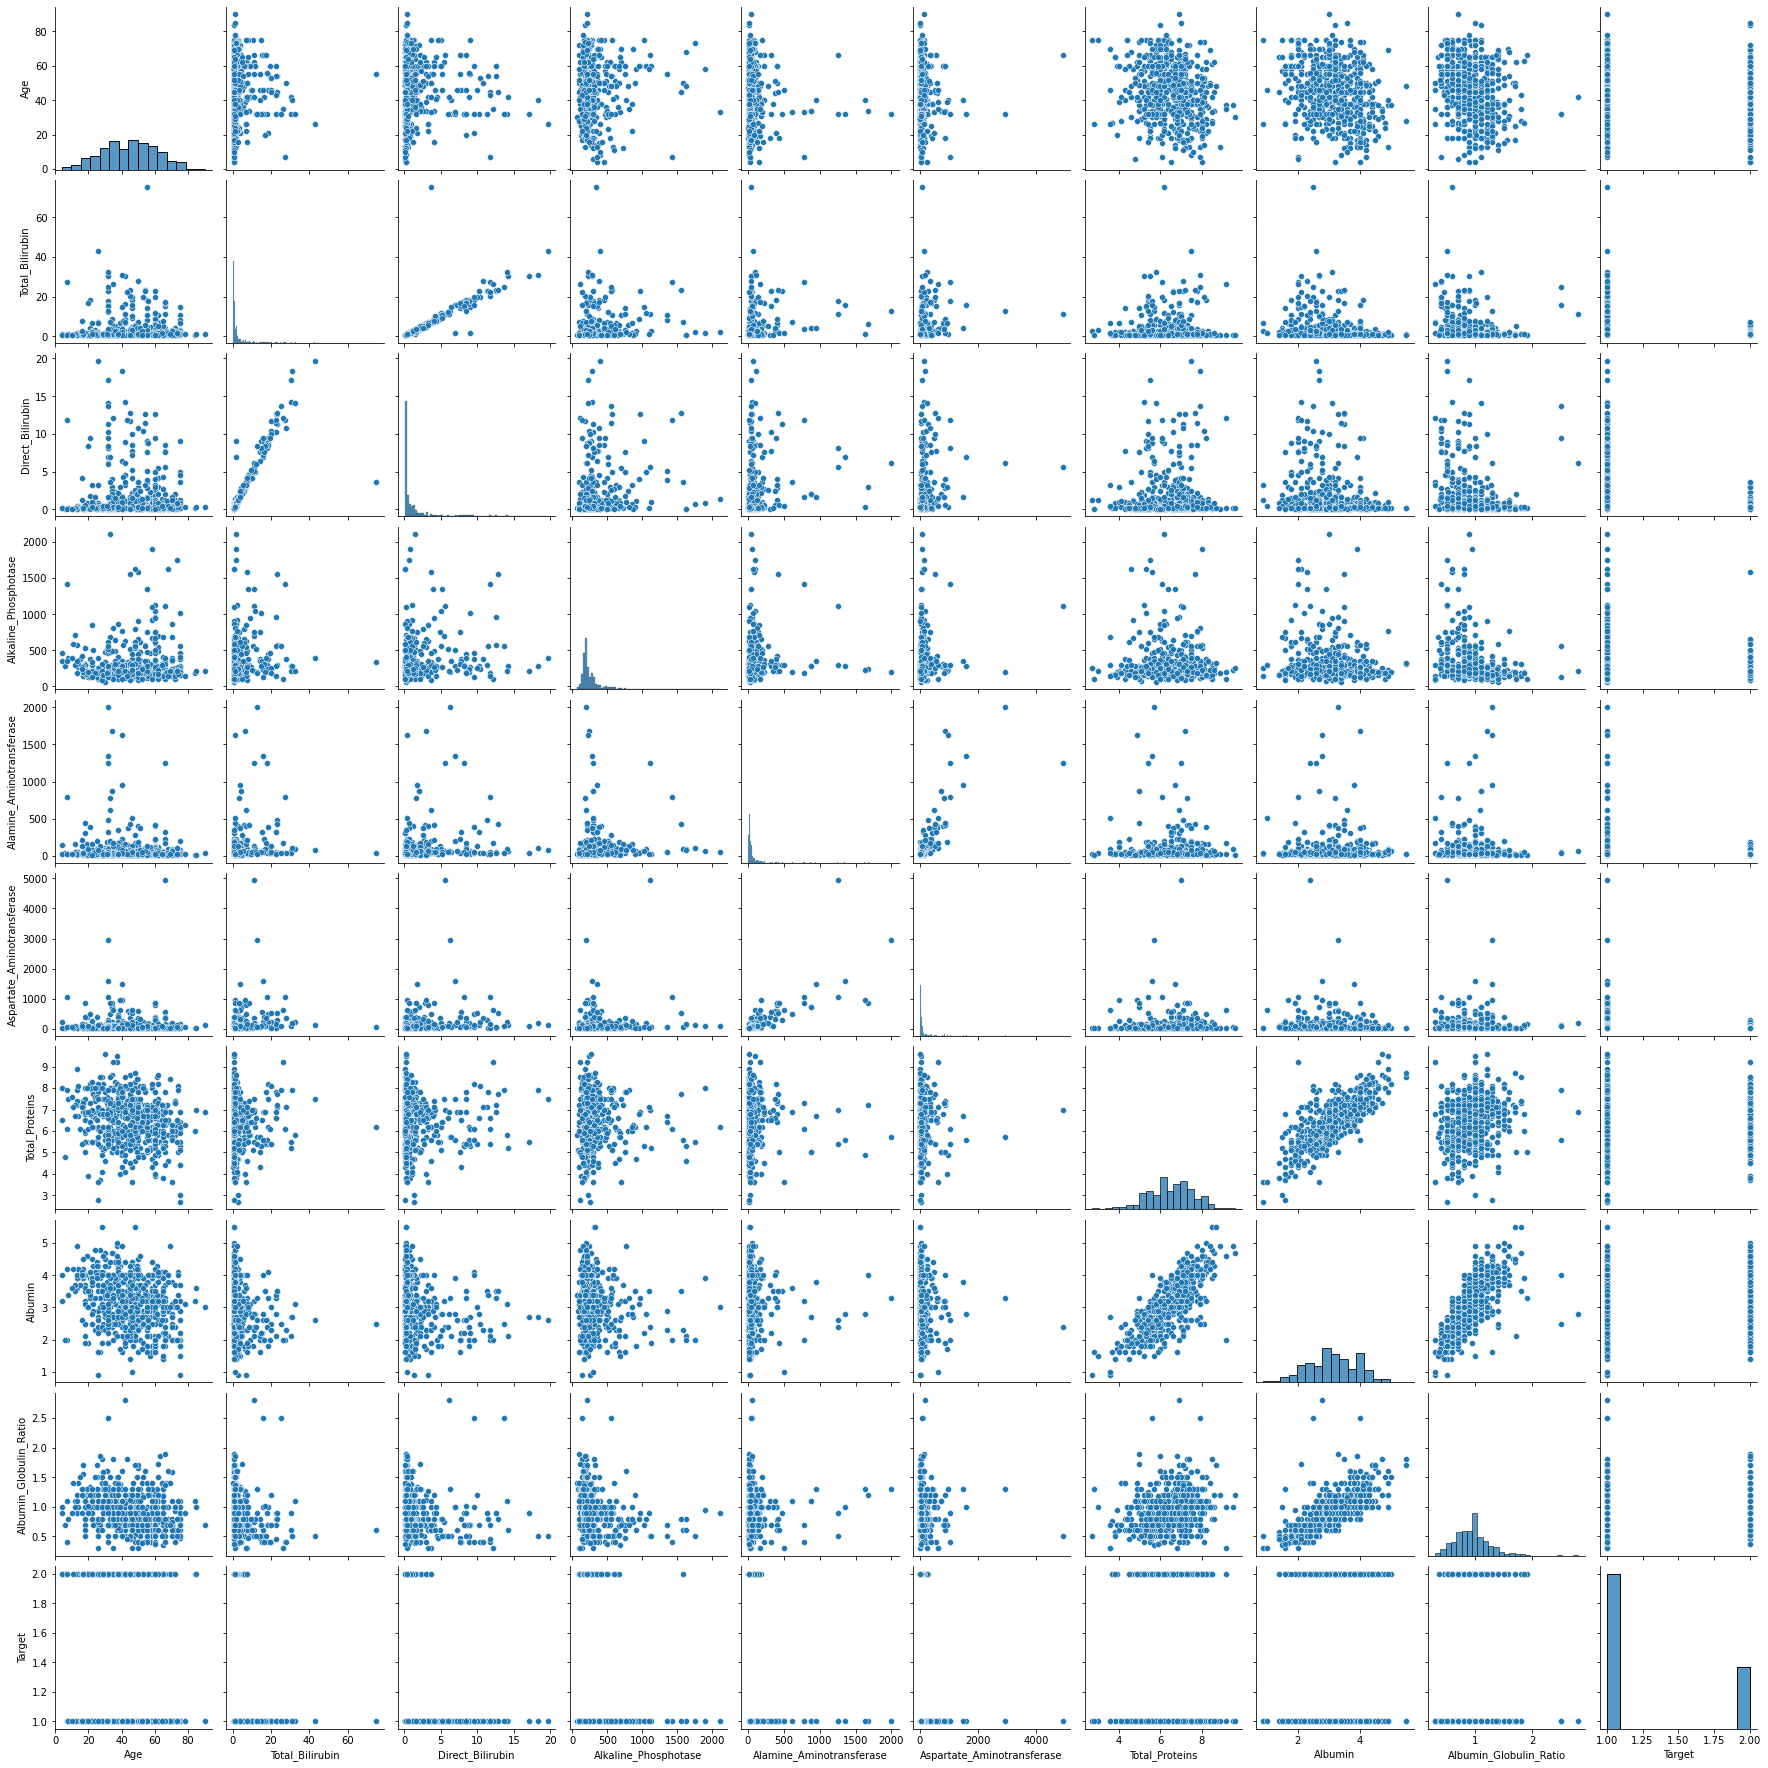

In [17]:
sns.pairplot(df)

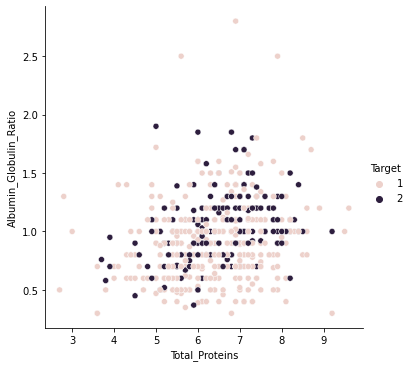

In [21]:
sns.relplot(x='Total_Proteins',y='Albumin_Globulin_Ratio',hue="Target",data=df)

# DATA PREPROCESSING / FEATURE ENGINEERING

## 1.CHECKING AND IMPUTING MISSING VALUE

In [22]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

* ### Only 4 values in 'Albumin_Globulin_Ratio' are missing.

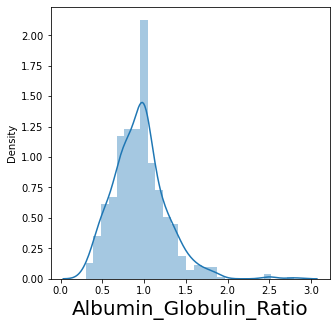

In [23]:
# checking the distributuion before imputing the NULL to decide between mean() and median()
plt.figure(figsize=(5,5)) # defining canvas size
sns.distplot(x=df['Albumin_Globulin_Ratio']) 
plt.xlabel('Albumin_Globulin_Ratio',fontsize=20)
plt.show()

* #### The plot is almost normally distributed. So we choose mean() of the data to impute the NULL

In [24]:
df.loc[df['Albumin_Globulin_Ratio'].isnull()==True,'Albumin_Globulin_Ratio']=df['Albumin_Globulin_Ratio'].mean()

In [25]:
df['Albumin_Globulin_Ratio'].isnull().sum()

0

## 2.ENCODING CATEGORICAL DATA

In [26]:
df.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [27]:
# as Male is too high, we give it higher value,1.
df.Gender = df.Gender.map({'Male':1,'Female':0})

In [28]:
df.Gender.value_counts()

1    441
0    142
Name: Gender, dtype: int64

In [29]:
df.Target.value_counts()

1    416
2    167
Name: Target, dtype: int64

In [30]:
# As 1 indicated 'liver disease' and 2 indicated 'No liver disease', we change 2 to 0, to make the target binary.
df.loc[df['Target']==2,'Target']=0

In [31]:
df.Target.value_counts()

1    416
0    167
Name: Target, dtype: int64

In [32]:
df.head(1)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      583 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


## 3. HANDLING OUTLIERS

In [34]:
out1= df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_Globulin_Ratio']]

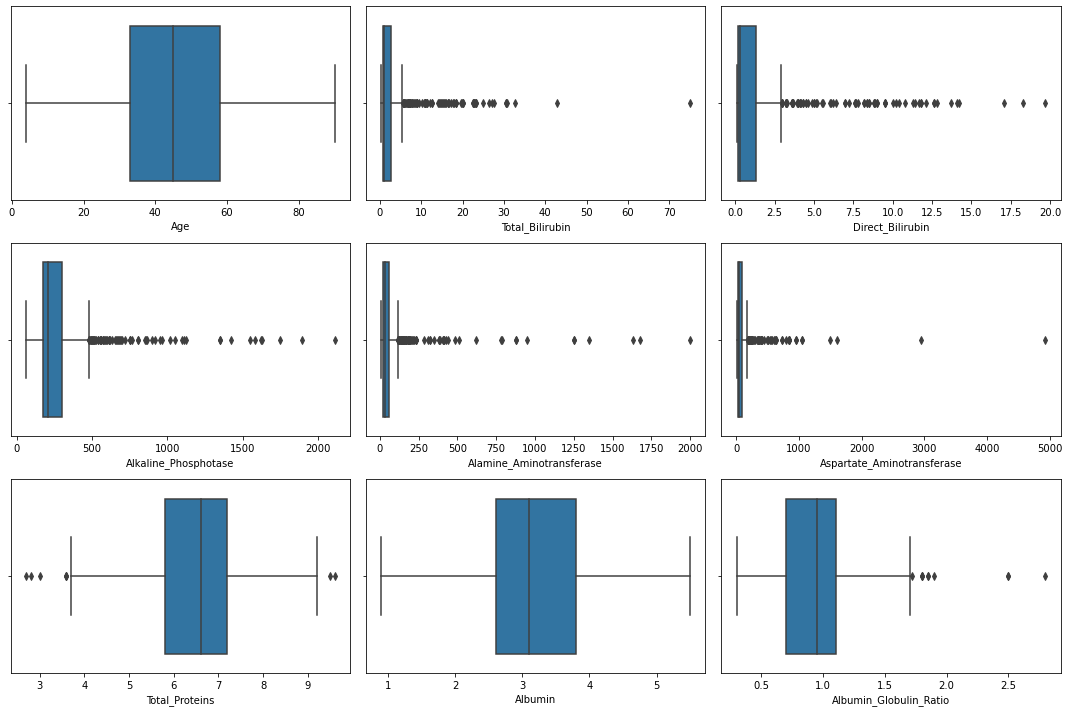

In [35]:
plt.figure(figsize=(15,10)) # defining canvas size
plotno = 1 # counter

for column in out1: # iteration of columns / accessing the columns from  dataset 
    if plotno<=9:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 11 graphs (3-rows,4-columns) ,plotnumber is for count
        sns.boxplot(x=df[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=10)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

* 'Age' and 'albumin' do not have outliers.
* 'Total_Proteins'and 'Albumin_Globulin_Ratio' have few outliers.
* Rest of the features have lot of outliers. So we do not impute them.

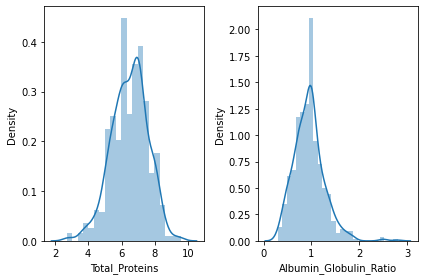

In [36]:
plotno = 1 # counter

for column in ['Total_Proteins', 'Albumin_Globulin_Ratio']: # iteration of columns / acessing the columns from  dataset 
    if plotno<=2:    # set the limit
        plt.subplot(1,2,plotno) # # plotting 11 graphs (3-rows,4-columns) ,plotnumber is for count
        sns.distplot(x=df[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=10)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show()

* #### since both the plots are normally distributed we use 3 sigma to calculate min limit and max limit

#### 'Total_Proteins'

In [37]:
max_limit = df['Total_Proteins'].mean() + 3*df['Total_Proteins'].std()

min_limit = df['Total_Proteins'].mean() - 3*df['Total_Proteins'].std()

# Identify outliers
outliers = df[(df['Total_Proteins'] < min_limit) | (df['Total_Proteins'] > max_limit)]
display(outliers.head(10))

print(f'% of outliers present in Total_Proteins: {len(outliers)/df.shape[0]*100}')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
180,75,1,2.8,1.3,250,23,29,2.7,0.9,0.5,1
181,75,1,2.9,1.3,218,33,37,3.0,1.5,1.0,1
269,26,1,0.6,0.1,110,15,20,2.8,1.6,1.3,1


% of outliers present in Total_Proteins: 0.5145797598627788


In [38]:
# 'Total_Proteins' has just 3 outliers . So, we impute them with mean()
df.loc[df['Total_Proteins'] <  min_limit,'Total_Proteins'] = df['Total_Proteins'].mean()
df.loc[df['Total_Proteins'] > max_limit,'Total_Proteins'] = df['Total_Proteins'].mean()

In [39]:
# Rechecking for any more outliers
outliers = df[(df['Total_Proteins'] < min_limit) | (df['Total_Proteins'] > max_limit)]
display(outliers.head(10))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target


#### 'Albumin_Globulin_Ratio'

In [40]:
max_limit = df['Albumin_Globulin_Ratio'].mean() + 3*df['Albumin_Globulin_Ratio'].std()

min_limit = df['Albumin_Globulin_Ratio'].mean() - 3*df['Albumin_Globulin_Ratio'].std()

# Identify outliers
outliers = df[(df['Albumin_Globulin_Ratio'] < min_limit) | (df['Albumin_Globulin_Ratio'] > max_limit)]
display(outliers.head(10))

print(f'% of outliers present in Albumin_Globulin_Ratio: {len(outliers)/df.shape[0]*100}')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
548,42,1,11.1,6.1,214,60,186,6.9,2.8,2.8,1
572,32,1,15.6,9.5,134,54,125,5.6,4.0,2.5,1
575,32,1,25.0,13.7,560,41,88,7.9,2.5,2.5,1


% of outliers present in Albumin_Globulin_Ratio: 0.5145797598627788


In [41]:
# 'Albumin_Globulin_Ratio' has just 3 outliers . So, we impute them with mean()
df.loc[df['Albumin_Globulin_Ratio'] > max_limit,'Albumin_Globulin_Ratio'] = df['Albumin_Globulin_Ratio'].mean()

In [42]:
# Rechecking for any more outliers
outliers = df[(df['Albumin_Globulin_Ratio'] < min_limit) | (df['Albumin_Globulin_Ratio'] > max_limit)]
display(outliers.head(10))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target


## 4. CHECK FOR DUPLICATE ROWS

In [44]:
# checking for duplicate ROWS
df.duplicated().sum()

13

In [46]:
# displaying all the duplicate rows
df[df.duplicated(keep=False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_Globulin_Ratio,Target
18,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,1,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,1,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,1,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,1,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [47]:
df = df.drop_duplicates()

In [48]:
df.duplicated().sum()

0

In [49]:
df.shape

(570, 11)

* 13 rows are deleted.

# FEATURE ENGINEERING AND FEATURE SELECTION

## CHECK FOR DUPLICATE FEATURES

In [53]:
# checking for duplicate FEATURES
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_duplicate_features

get_duplicate_features(df)

,Desc,feature1,feature2


* There are no duplicate features.

## CHECK FOR CORRELATED FEATURES

In [54]:
# Only continuous features
data1=df.drop(d1,axis=1)

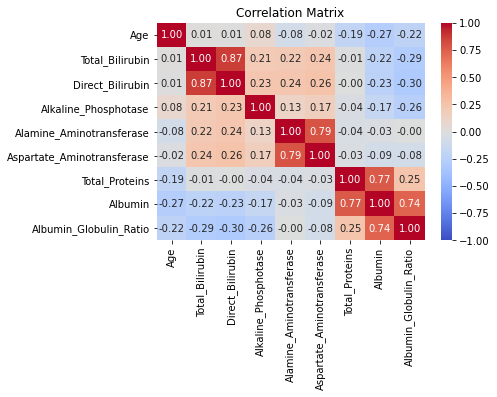

In [55]:
# identify highly negative and positive correlations by looking for dark blue and dark red cells with values close to -1 and +1 in the heatmap resp.
sns.heatmap(data1.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

* No features are highly correlated( above 0.90).

# SPLIT THE DATA FOR TRAIN AND TEST

In [56]:
X=df.drop(columns=['Target'])
y=df['Target']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# FEATURE SCALING
*  It is generally a good approach to perform feature scaling after the train-test split to prevent data leakage. 

### MIN-MAX SCALING

* Scale the feature between 0 to 1


* Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [58]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# BALANCE THE DATA
*  It is generally a good approach to handle class imbalance after the train-test split to prevent data leakage. 

In [59]:
y.value_counts()

1    406
0    164
Name: Target, dtype: int64

* Data is not balanced. Model will learn more about 1.

### SMOTE

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [61]:
from collections import Counter

# checking count for each class
print('Count of each class in train data before balancing:',Counter(y_train))

# Apply smote on train data
X_smote,y_smote=smote.fit_resample(X_train_scaled,y_train)

# checking count for each class after balancing
print('Count of each class in train data after balancing:',Counter(y_smote))

Count of each class in train data before balancing: Counter({1: 303, 0: 124})
Count of each class in train data after balancing: Counter({1: 303, 0: 303})


# MODEL BUILDING

## 1. LOGISTIC REGRESSION

### (a) Using Balanced Data

In [192]:
log=LogisticRegression()

In [193]:
log.fit(X_smote,y_smote)

LogisticRegression()

In [194]:
# Predicting using TEST data
y_pred=log.predict(X_test_scaled)

In [195]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Target,,
0,30,10
1,37,66


* There are 37+10=47 wrong predictions

In [196]:
f1=f1_score(y_test,y_pred)
f1

0.7374301675977656

In [197]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.45      0.75      0.56        40
           1       0.87      0.64      0.74       103

    accuracy                           0.67       143
   macro avg       0.66      0.70      0.65       143
weighted avg       0.75      0.67      0.69       143



In [198]:
#checking TEST accuracy
acc_test=accuracy_score(y_test,y_pred)
acc_test

0.6713286713286714

In [199]:
# Predicting using train data to check for OVERFITTING
y_smote_pred=log.predict(X_smote)

#checking TRAIN accuracy
acc_smote=accuracy_score(y_smote,y_smote_pred)
acc_smote

0.7029702970297029

In [200]:
print(classification_report(y_smote,y_smote_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74       303
           1       0.78      0.57      0.66       303

    accuracy                           0.70       606
   macro avg       0.72      0.70      0.70       606
weighted avg       0.72      0.70      0.70       606



* In BALANCED data, only train accuracy (0.70) is SLIGHTLY GREATER than test accuracy (0.67). Rest all the metrices are LOWER for train data than the test data. Hence, slightly overfitting.

In [201]:
from sklearn.metrics import roc_auc_score

y_pred_proba = log.predict_proba(X_test_scaled)[:, 1]

# True labels for the testing set
y_true = y_test

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_true, y_pred_proba)

print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.7422330097087377


* #### In BALANCED data, f1 score is **0.74**

### Hyperparameter Tuning Using GridsearchCV

In [202]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty ('l1' for Lasso, 'l2' for Ridge)
}
grid = GridSearchCV(LogisticRegression(random_state = 42), param_grid, verbose =1,scoring='f1',cv=5)

grid.fit(X_smote,y_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [203]:
print(grid.best_estimator_)

LogisticRegression(C=100, random_state=42)


In [204]:
log_hpt=LogisticRegression(C=100, random_state=42)

In [205]:
log_hpt.fit(X_smote,y_smote)

LogisticRegression(C=100, random_state=42)

In [206]:
# Predicting using TEST data
y_pred_hpt=log_hpt.predict(X_test_scaled)

In [207]:
pd.crosstab(y_test,y_pred_hpt)

col_0,0,1
Target,,
0,33,7
1,46,57


In [208]:
print(classification_report(y_test,y_pred_hpt))

              precision    recall  f1-score   support

           0       0.42      0.82      0.55        40
           1       0.89      0.55      0.68       103

    accuracy                           0.63       143
   macro avg       0.65      0.69      0.62       143
weighted avg       0.76      0.63      0.65       143



* After hyperparameter tuning, f1 score in balanced data has reduced from 0.74 to **0.68**

### (b) Using Unbalanced Data

In [209]:
log.fit(X_train_scaled,y_train)

LogisticRegression()

In [210]:
y_pred1=log.predict(X_test_scaled)

In [211]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
Target,,
0,3,37
1,1,102


* 38 wrong prediction

In [212]:
cr=classification_report(y_test,y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.07      0.14        40
           1       0.73      0.99      0.84       103

    accuracy                           0.73       143
   macro avg       0.74      0.53      0.49       143
weighted avg       0.74      0.73      0.65       143



In [213]:
f1=f1_score(y_test,y_pred1)
f1

0.8429752066115703

In [214]:
#checking TEST accuracy
acc_test=accuracy_score(y_test,y_pred1)
acc_test

0.7342657342657343

In [215]:
# Predicting using train data to check for OVERFITTING
y_train_pred1=log.predict(X_train_scaled)

In [216]:
#checking TRAIN accuracy
acc_train=accuracy_score(y_train,y_train_pred1)
acc_train

0.7072599531615925

In [217]:
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.44      0.03      0.06       124
           1       0.71      0.98      0.83       303

    accuracy                           0.71       427
   macro avg       0.58      0.51      0.44       427
weighted avg       0.63      0.71      0.60       427



* In UNBALANCED data, all the metrics are SLIGHTLY LOWER for train data than the test data prediction. Hence, NO OVERFITTING.

In [218]:
y_pred_proba = log.predict_proba(X_test_scaled)[:, 1]

# True labels for the testing set
y_true = y_test

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_true, y_pred_proba)

print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.725242718446602


* #### In UNBALANCED data, f1 score is **0.84**

### Hyperparameter Tuning Using GridSearch CV

In [220]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty ('l1' for Lasso, 'l2' for Ridge)
}
grid = GridSearchCV(LogisticRegression(random_state = 42), param_grid, verbose =1,scoring='f1',cv=5)

grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [221]:
print(grid.best_estimator_)

LogisticRegression(C=0.001, random_state=42)


In [222]:
log_hpt=LogisticRegression(C=0.001, random_state=42)

In [223]:
log_hpt.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, random_state=42)

In [224]:
y_pred_hpt=log_hpt.predict(X_test_scaled)

In [225]:
pd.crosstab(y_test,y_pred_hpt)

col_0,1
Target,
0,40
1,103


* There is no 0 prediction at all by the model for unbalanced data.
* There are 40 wrong predictions as 1

In [226]:
print(classification_report(y_test,y_pred_hpt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.72      1.00      0.84       103

    accuracy                           0.72       143
   macro avg       0.36      0.50      0.42       143
weighted avg       0.52      0.72      0.60       143



* #### f1 score for UNBALANCED data is **0.84** even after applying hyperparameter tuning

## 2. SUPPORT VECTOR CLASSIFIER

### (a) Using BALANCED Data

In [227]:
svclassifier = SVC() ## base model with default parameters

In [228]:
svclassifier.fit(X_smote, y_smote)

SVC()

In [229]:
y_pred=svclassifier.predict(X_test_scaled)

In [230]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Target,,
0,34,6
1,50,53


* 56 wrong prediction in balanced data.

In [231]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.85      0.55        40
           1       0.90      0.51      0.65       103

    accuracy                           0.61       143
   macro avg       0.65      0.68      0.60       143
weighted avg       0.76      0.61      0.62       143



In [232]:
f1=f1_score(y_test,y_pred)
f1

0.654320987654321

### Hyper Parameter Tuning Using GridSearchCV

In [233]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =1,scoring='f1',cv=3)

grid.fit(X_smote, y_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [234]:
print(grid.best_params_)

{'C': 100, 'gamma': 1}


In [235]:
print(grid.best_estimator_)

SVC(C=100, gamma=1, random_state=42)


In [236]:
svclassifier_hpt=SVC(C=100, gamma=1, random_state=42)

In [237]:
svclassifier_hpt.fit(X_smote, y_smote)

SVC(C=100, gamma=1, random_state=42)

In [238]:
y_pred_hpt=svclassifier_hpt.predict(X_test_scaled)

In [239]:
pd.crosstab(y_test,y_pred_hpt)

col_0,0,1
Target,,
0,29,11
1,44,59


* 55 wrong predictions.

In [240]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.72      0.51        40
           1       0.84      0.57      0.68       103

    accuracy                           0.62       143
   macro avg       0.62      0.65      0.60       143
weighted avg       0.72      0.62      0.63       143



In [241]:
f1=f1_score(y_test,y_pred_hpt)
f1

0.6820809248554913

* #### In BALANCED data, after applying hyperparameter tuning, f1 score is **0.68**

### (b) Using UNBALANCED Data

In [242]:
svclassifier.fit(X_train_scaled, y_train)

SVC()

In [243]:
# Predicting using TEST data
y_pred1=svclassifier.predict(X_test_scaled)

In [244]:
pd.crosstab(y_test,y_pred1)

col_0,1
Target,
0,40
1,103


* There is no 0 prediction at all by the model for unbalanced data.
* There are 40 wrong predictions as 1

In [245]:
cr=classification_report(y_test,y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.72      1.00      0.84       103

    accuracy                           0.72       143
   macro avg       0.36      0.50      0.42       143
weighted avg       0.52      0.72      0.60       143



In [246]:
#checking test accuracy
acc_test=accuracy_score(y_test,y_pred1)
acc_test

0.7202797202797203

In [247]:
# Predicting using TRAIN data to check for OVERFITTING
y_train_pred1=svclassifier.predict(X_train_scaled)

In [248]:
#checking train accuracy
acc_train=accuracy_score(y_train,y_train_pred1)
acc_train

0.7096018735362998

In [249]:
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.71      1.00      0.83       303

    accuracy                           0.71       427
   macro avg       0.35      0.50      0.42       427
weighted avg       0.50      0.71      0.59       427



*  In UNBALANCED data, all the metrics are SLIGHTLY LOWER for train data than the test data prediction. Hence, NO OVERFITTING.

### Hyper Parameter Tuning Using GridSearchCV

In [250]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =1,scoring='f1',cv=3)

grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [251]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, random_state=42)


In [252]:
svclassifier_hpt=SVC(C=0.1, gamma=1, random_state=42)

In [253]:
svclassifier_hpt.fit(X_train_scaled, y_train)

SVC(C=0.1, gamma=1, random_state=42)

In [254]:
y_pred_hpt=svclassifier_hpt.predict(X_test_scaled)

In [255]:
pd.crosstab(y_test,y_pred_hpt)

col_0,1
Target,
0,40
1,103


* There is no 0 prediction at all by the model for balanced data as well.
* There are 40 wrong predictions as 1

In [256]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.72      1.00      0.84       103

    accuracy                           0.72       143
   macro avg       0.36      0.50      0.42       143
weighted avg       0.52      0.72      0.60       143



In [257]:
f1=f1_score(y_test,y_pred_hpt)
f1

0.8373983739837398

* #### Even after applying hyperparameter tuning, all the metrics are same for UNBALANCED data.
* #### f1 score for UNBALANCED data after applying hyperparameter tuning is **0.84**

## 3. RANDOM FOREST

### (a) Using BALANCED Data

In [132]:
rf_clf = RandomForestClassifier(n_estimators=100) #object creation ,taking 100 decision tree in random forest 

In [133]:
rf_clf.fit(X_smote,y_smote)

RandomForestClassifier()

In [134]:
y_pred=rf_clf.predict(X_test_scaled)

In [135]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Target,,
0,21,19
1,25,78


* 44 wrong prediction.

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.53      0.49        40
           1       0.80      0.76      0.78       103

    accuracy                           0.69       143
   macro avg       0.63      0.64      0.63       143
weighted avg       0.71      0.69      0.70       143



In [137]:
f1_score(y_test,y_pred)

0.78

## Hyper Parameter Tuning Using RandomizedSearchCV

In [138]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees. linespace gives float. so convert to int.
max_features = ['log2', 'sqrt']   # because random forest do feature sampling also.                               #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.

In [139]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [140]:
rf_clf1 = RandomForestClassifier(random_state=42)

In [141]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


In [142]:
rf_cv.fit(X_smote, y_smote)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70})


In [143]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=70, n_estimators=200, random_state=42)

In [144]:
rf_clf_hpt = RandomForestClassifier(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 1, 
                                 max_features= 'sqrt', max_depth= 70)

In [145]:
rf_clf_hpt.fit(X_smote, y_smote)

y_pred_hpt=rf_clf_hpt.predict(X_test_scaled)

f1_score(y_test,y_pred_hpt)

0.788177339901478

In [146]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.47      0.50      0.48        40
           1       0.80      0.78      0.79       103

    accuracy                           0.70       143
   macro avg       0.63      0.64      0.64       143
weighted avg       0.71      0.70      0.70       143



* #### In BALANCED data, after applying hyperparameter tuning, f1 score is **0.79**

### (b) Using UNBALANCED Data

In [147]:
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [148]:
# Predicting using TEST data
y_pred1=rf_clf.predict(X_test_scaled)

In [149]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
Target,,
0,15,25
1,11,92


* 36 wrong prediction

In [150]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.58      0.38      0.45        40
           1       0.79      0.89      0.84       103

    accuracy                           0.75       143
   macro avg       0.68      0.63      0.65       143
weighted avg       0.73      0.75      0.73       143



In [151]:
f1_score(y_test,y_pred1 )

0.8363636363636364

### Hyperparameter Tuning Using RandomizedSearchCV

In [152]:
rf_cv.fit(X_train_scaled, y_train)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40})


In [153]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=40, max_features='log2', n_estimators=1800,
                       random_state=42)

In [154]:
rf_clf_hpt = RandomForestClassifier(n_estimators= 1800, min_samples_split= 2, min_samples_leaf= 1, 
                                 max_features= 'log2', max_depth= 40)

In [155]:
rf_clf_hpt.fit(X_train_scaled, y_train)

y_pred_hpt=rf_clf_hpt.predict(X_test_scaled)

f1_score(y_test,y_pred_hpt)

0.8272727272727274

In [156]:
cr=classification_report(y_test,y_pred_hpt)
print(cr)

              precision    recall  f1-score   support

           0       0.54      0.35      0.42        40
           1       0.78      0.88      0.83       103

    accuracy                           0.73       143
   macro avg       0.66      0.62      0.63       143
weighted avg       0.71      0.73      0.71       143



* #### In UNBALANCED data, after applying hyperparameter tuning, f1 score is **0.83**